# Análisis - Dataset Amazon Sales 2025

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Importación de los datos
Creación del dataframe para trabajar con pandas

In [2]:
df = pd.read_csv('./amazon_sales_data 2025.csv')

In [3]:
df

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-25,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-25,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-25,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-25,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10-03-25,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending
...,...,...,...,...,...,...,...,...,...,...,...
245,ORD0246,17-03-25,T-Shirt,Clothing,20,2,40,Daniel Harris,Miami,Debit Card,Cancelled
246,ORD0247,30-03-25,Jeans,Clothing,40,1,40,Sophia Miller,Dallas,Debit Card,Cancelled
247,ORD0248,05-03-25,T-Shirt,Clothing,20,2,40,Chris White,Denver,Debit Card,Cancelled
248,ORD0249,08-03-25,Smartwatch,Electronics,150,3,450,Emily Johnson,New York,Debit Card,Cancelled


## EDA - Análisis EXploratorio de los datos

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Order ID           250 non-null    object
 1   Date               250 non-null    object
 2   Product            250 non-null    object
 3   Category           250 non-null    object
 4   Price              250 non-null    int64 
 5   Quantity           250 non-null    int64 
 6   Total Sales        250 non-null    int64 
 7   Customer Name      250 non-null    object
 8   Customer Location  250 non-null    object
 9   Payment Method     250 non-null    object
 10  Status             250 non-null    object
dtypes: int64(3), object(8)
memory usage: 21.6+ KB


In [46]:
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\nicol\AppData\Local\Temp\ipykernel_2524\2394721818.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order ID           250 non-null    object        
 1   Date               250 non-null    datetime64[ns]
 2   Product            250 non-null    object        
 3   Category           250 non-null    object        
 4   Price              250 non-null    int64         
 5   Quantity           250 non-null    int64         
 6   Total Sales        250 non-null    int64         
 7   Customer Name      250 non-null    object        
 8   Customer Location  250 non-null    object        
 9   Payment Method     250 non-null    object        
 10  Status             250 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 21.6+ KB


In [4]:
df.describe()

,Price,Quantity,Total Sales
count,250.000000,250.000000,250.000000
mean,343.580000,2.856000,975.380000
std,380.635808,1.429489,1252.112254
min,15.000000,1.000000,15.000000
25%,40.000000,2.000000,100.000000
50%,150.000000,3.000000,400.000000
75%,600.000000,4.000000,1500.000000
max,1200.000000,5.000000,6000.000000


### Columna 'Order ID'
Tenemos 250 valores unicos que corresponden a 250 ventas/compras

In [7]:
df['Order ID'].nunique()

250

### Columna 'Category'
Tenemos 5 valores unicos que corresponden a las categorías de productos Footwear, Electronics, Clothing, Books y Home Appliances

In [8]:
df['Category'].nunique()

5

In [19]:
df['Category'].unique()

array(['Footwear', 'Electronics', 'Clothing', 'Books', 'Home Appliances'],
      dtype=object)

### Columna 'Customer Name'
Tenemos 10 valores unicos que corresponden a los clientes que realizaron las compras

In [15]:
df['Customer Name'].nunique()

10

In [20]:
df['Customer Name'].unique()

array(['Emma Clark', 'Emily Johnson', 'John Doe', 'Olivia Wilson',
       'Sophia Miller', 'David Lee', 'Michael Brown', 'Daniel Harris',
       'Chris White', 'Jane Smith'], dtype=object)

### Columna 'Customer Location'
Tenemos 10 valores unicos que corresponden a las ciudades de residencia de los clientes

In [16]:
df['Customer Location'].nunique()

10

In [21]:
df['Customer Location'].unique()

array(['New York', 'San Francisco', 'Denver', 'Dallas', 'Houston',
       'Miami', 'Boston', 'Seattle', 'Los Angeles', 'Chicago'],
      dtype=object)

### Columna 'Payment Method'
Tenemos 5 valores unicos que corresponden a los tipos de pagos que se utilizaron para realizar las compras

In [17]:
df['Payment Method'].nunique()

5

In [18]:
df['Payment Method'].unique()

array(['Debit Card', 'Amazon Pay', 'Credit Card', 'PayPal', 'Gift Card'],
      dtype=object)

### Columna 'Status'
Tenemos 3 valores unicos que corresponden a el estado de la transacción (Cancelled, Pending o Completed)

In [22]:
df['Status'].nunique()

3

In [23]:
df['Status'].unique()

array(['Cancelled', 'Pending', 'Completed'], dtype=object)

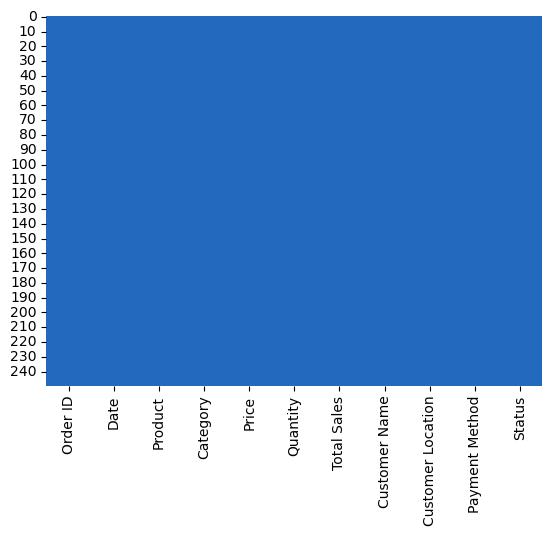

In [30]:
mascara_faltantes = df.isnull()

# Heatmap para verificar datos faltantes
sns.heatmap(mascara_faltantes, cbar=False, cmap='vlag')
plt.show()

## Gráficos

In [48]:
df.head()

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,2025-03-14,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,2025-03-20,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,2025-02-15,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,2025-02-19,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,2025-10-03,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending


In [49]:
df_ordenado = df.sort_values(by='Date').reset_index(drop=True)

In [50]:
df_ordenado

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0154,2025-01-03,Headphones,Electronics,100,2,200,John Doe,Denver,Debit Card,Completed
1,ORD0013,2025-01-03,Laptop,Electronics,800,2,1600,Daniel Harris,San Francisco,Gift Card,Pending
2,ORD0059,2025-01-04,Smartwatch,Electronics,150,2,300,Daniel Harris,Dallas,Credit Card,Cancelled
3,ORD0017,2025-01-04,T-Shirt,Clothing,20,1,20,Emma Clark,New York,Amazon Pay,Completed
4,ORD0208,2025-02-02,Refrigerator,Home Appliances,1200,3,3600,John Doe,Miami,PayPal,Completed
...,...,...,...,...,...,...,...,...,...,...,...
245,ORD0228,2025-12-02,Running Shoes,Footwear,60,1,60,David Lee,San Francisco,Credit Card,Pending
246,ORD0060,2025-12-03,Book,Books,15,5,75,Jane Smith,Dallas,Credit Card,Pending
247,ORD0197,2025-12-03,Running Shoes,Footwear,60,2,120,Michael Brown,Denver,Gift Card,Completed
248,ORD0172,2025-12-03,Book,Books,15,1,15,David Lee,Miami,Debit Card,Cancelled


In [52]:
df_ordenado['Date'].nunique()

60

In [56]:
df_ordenado['Date'].unique()

<DatetimeArray>
['2025-01-03 00:00:00', '2025-01-04 00:00:00', '2025-02-02 00:00:00',
 '2025-02-03 00:00:00', '2025-02-04 00:00:00', '2025-02-13 00:00:00',
 '2025-02-14 00:00:00', '2025-02-15 00:00:00', '2025-02-16 00:00:00',
 '2025-02-17 00:00:00', '2025-02-18 00:00:00', '2025-02-19 00:00:00',
 '2025-02-20 00:00:00', '2025-02-21 00:00:00', '2025-02-22 00:00:00',
 '2025-02-23 00:00:00', '2025-02-24 00:00:00', '2025-02-25 00:00:00',
 '2025-02-26 00:00:00', '2025-02-27 00:00:00', '2025-02-28 00:00:00',
 '2025-03-02 00:00:00', '2025-03-03 00:00:00', '2025-03-13 00:00:00',
 '2025-03-14 00:00:00', '2025-03-15 00:00:00', '2025-03-16 00:00:00',
 '2025-03-17 00:00:00', '2025-03-18 00:00:00', '2025-03-19 00:00:00',
 '2025-03-20 00:00:00', '2025-03-21 00:00:00', '2025-03-22 00:00:00',
 '2025-03-23 00:00:00', '2025-03-24 00:00:00', '2025-03-25 00:00:00',
 '2025-03-26 00:00:00', '2025-03-27 00:00:00', '2025-03-28 00:00:00',
 '2025-03-29 00:00:00', '2025-03-30 00:00:00', '2025-03-31 00:00:00',
 '20

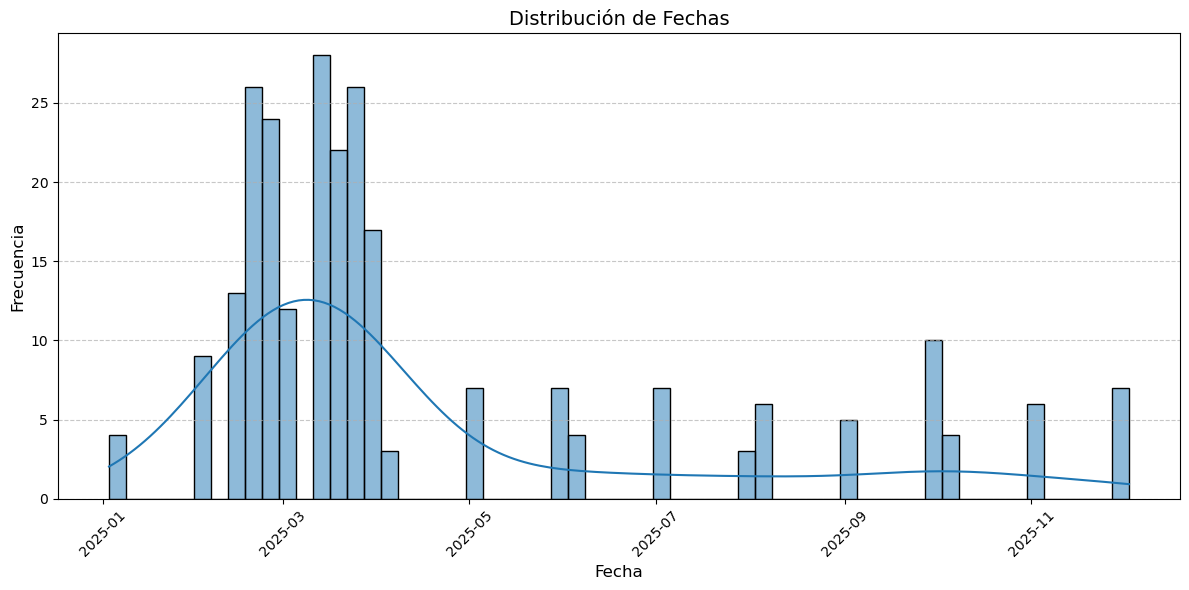

In [58]:
plt.figure(figsize=(12, 6))
# Gráfico de distribución de fechas
sns.histplot(df_ordenado['Date'], bins=60, kde=True)
plt.title('Distribución de Fechas', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

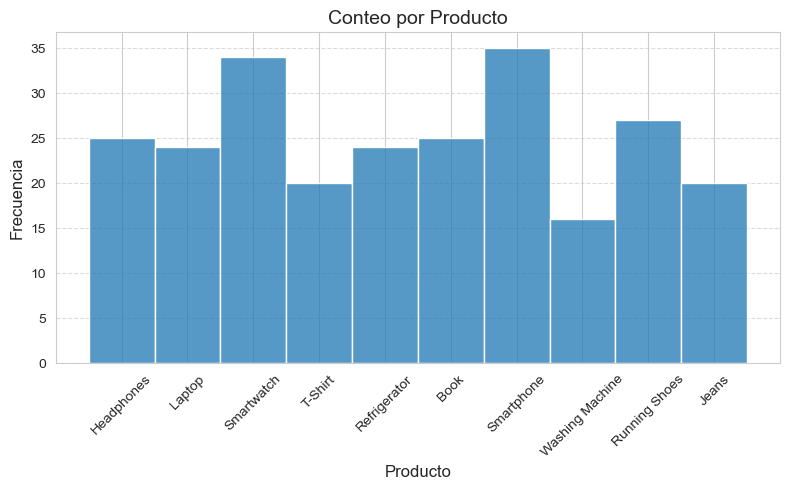

In [71]:
plt.figure(figsize=(8, 5))
# Gráfico de distribución de fechas
sns.histplot(data=df_ordenado, x='Product')
plt.title('Conteo por Producto', fontsize=14)
plt.xlabel('Producto', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


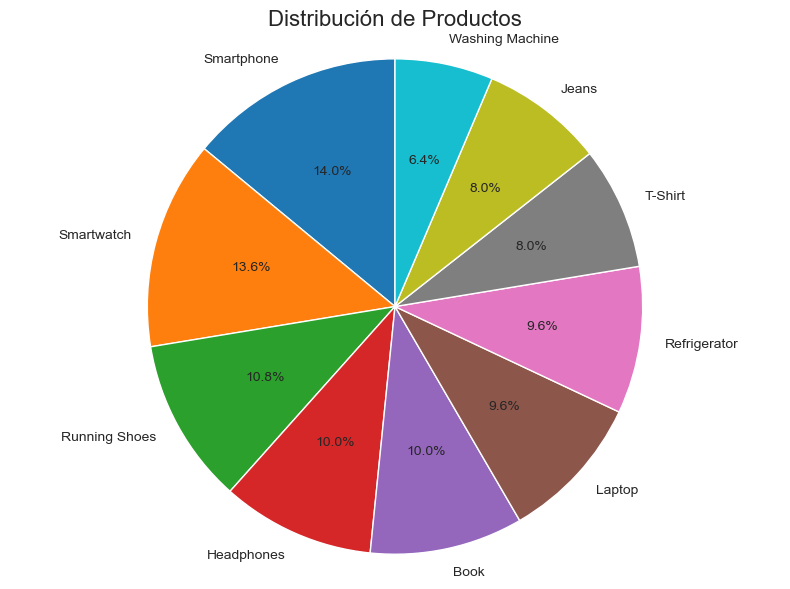

In [75]:
# Frecuencia de cada producto
product_counts = df_ordenado['Product'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie( product_counts, labels=product_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Productos', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()

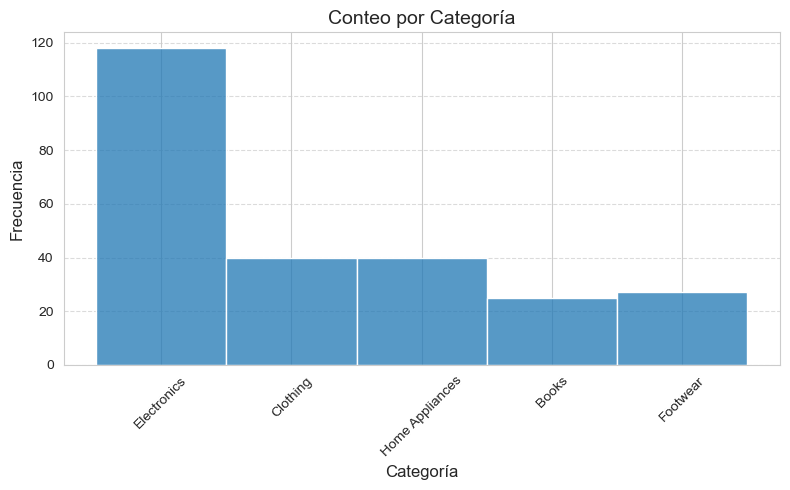

In [76]:
plt.figure(figsize=(8, 5))
# Gráfico de distribución de fechas
sns.histplot(data=df_ordenado, x='Category')
plt.title('Conteo por Categoría', fontsize=14)
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


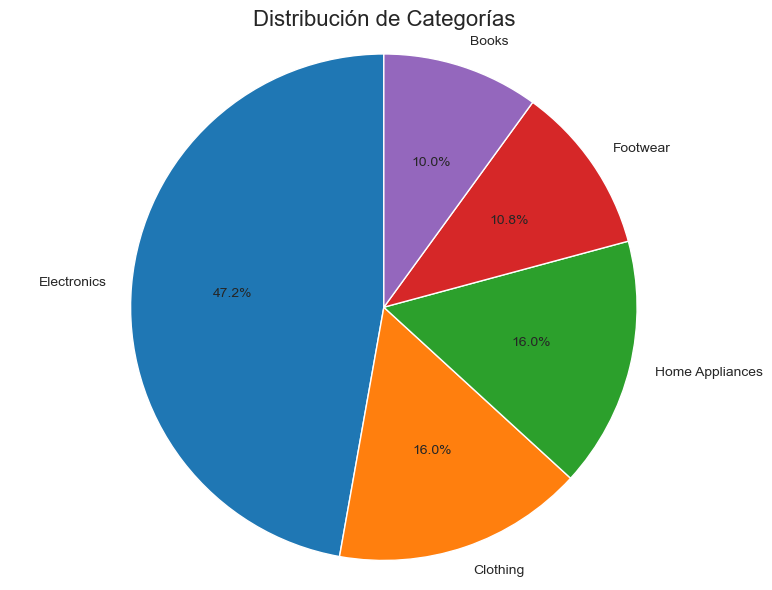

In [99]:
# Frecuencia de cada categoría
category_counts = df_ordenado['Category'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie( category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Categorías', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()

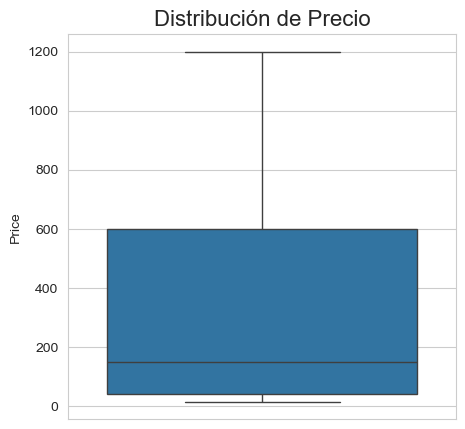

In [86]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=df_ordenado, y='Price')
plt.title('Distribución de Precio', fontsize=16)
plt.show()


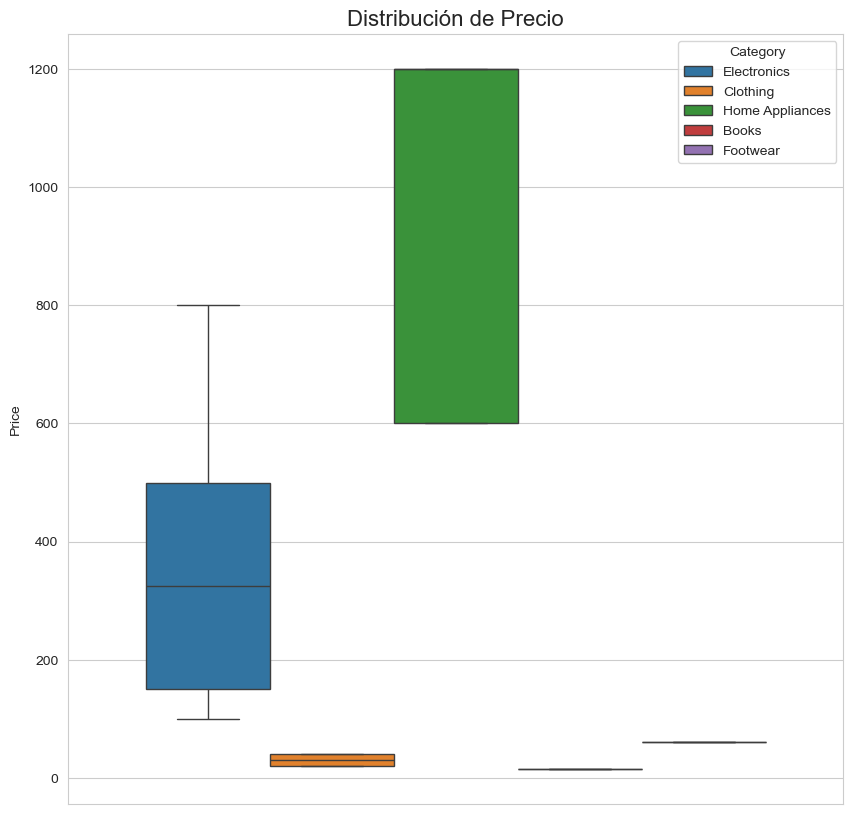

In [146]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df_ordenado, y='Price', hue='Category')
plt.title('Distribución de Precio', fontsize=16)
plt.show()

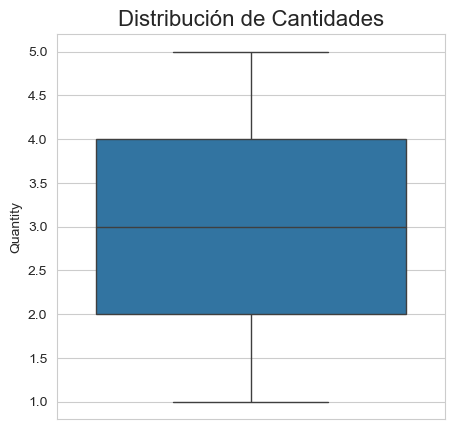

In [88]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=df_ordenado, y='Quantity')
plt.title('Distribución de Cantidades', fontsize=16)
plt.show()


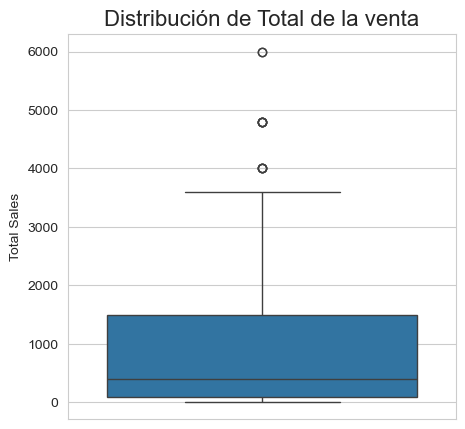

In [93]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=df_ordenado, y='Total Sales')
plt.title('Distribución de Total de la venta', fontsize=16)
plt.show()

In [83]:
df[df['Total Sales']>3500]

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
21,ORD0022,2025-07-03,Refrigerator,Home Appliances,1200,4,4800,Olivia Wilson,Houston,Credit Card,Pending
23,ORD0024,2025-03-24,Refrigerator,Home Appliances,1200,3,3600,Chris White,Dallas,Credit Card,Cancelled
44,ORD0045,2025-03-15,Refrigerator,Home Appliances,1200,3,3600,Daniel Harris,New York,Credit Card,Pending
61,ORD0062,2025-10-02,Laptop,Electronics,800,5,4000,Olivia Wilson,San Francisco,PayPal,Completed
63,ORD0064,2025-02-13,Refrigerator,Home Appliances,1200,4,4800,Emily Johnson,Denver,PayPal,Pending
68,ORD0069,2025-02-25,Refrigerator,Home Appliances,1200,4,4800,David Lee,Boston,Gift Card,Pending
73,ORD0074,2025-03-25,Refrigerator,Home Appliances,1200,4,4800,Jane Smith,Dallas,Gift Card,Cancelled
92,ORD0093,2025-06-03,Refrigerator,Home Appliances,1200,5,6000,David Lee,Denver,PayPal,Cancelled
119,ORD0120,2025-02-16,Laptop,Electronics,800,5,4000,Emily Johnson,Denver,PayPal,Completed
125,ORD0126,2025-04-02,Refrigerator,Home Appliances,1200,5,6000,Olivia Wilson,Chicago,Gift Card,Pending


In [91]:
df.loc[df['Category'] == 'Home Appliances', 'Product'].unique()

array(['Washing Machine', 'Refrigerator'], dtype=object)

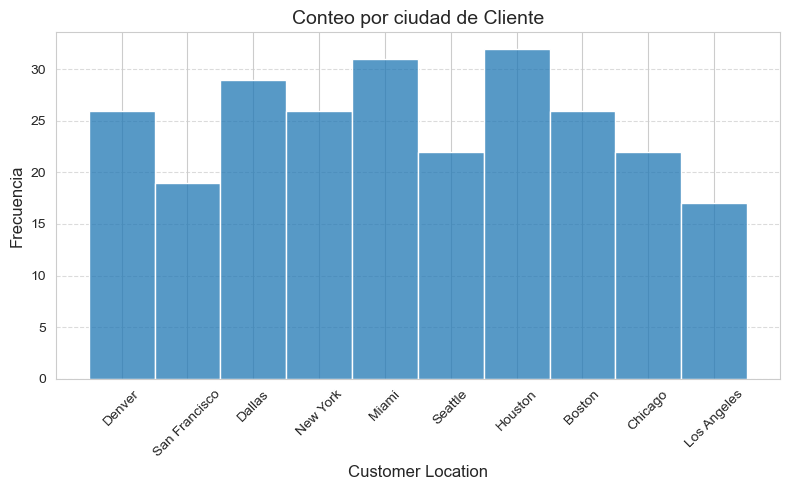

In [94]:
plt.figure(figsize=(8, 5))
# Gráfico de distribución de fechas
sns.histplot(data=df_ordenado, x='Customer Location')
plt.title('Conteo por ciudad de Cliente', fontsize=14)
plt.xlabel('Customer Location', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

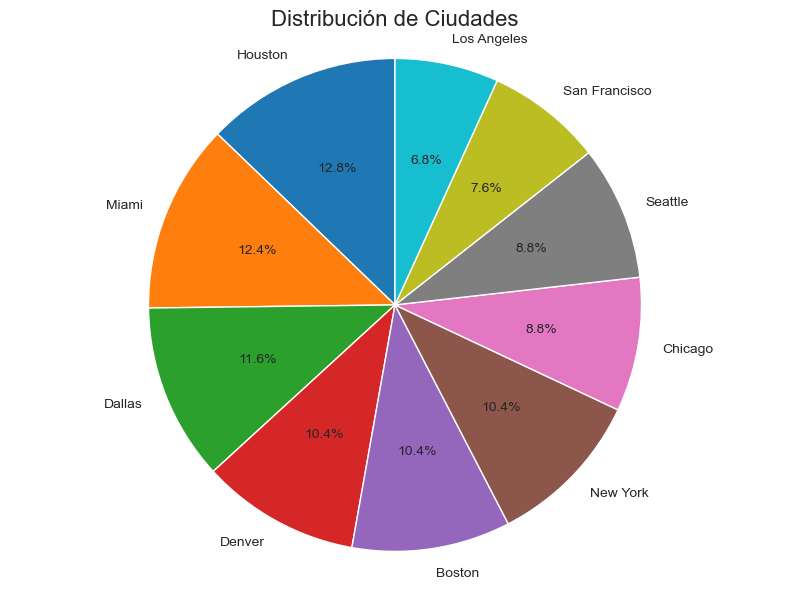

In [103]:
locations_counts = df_ordenado['Customer Location'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie( locations_counts , labels=locations_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Ciudades', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()


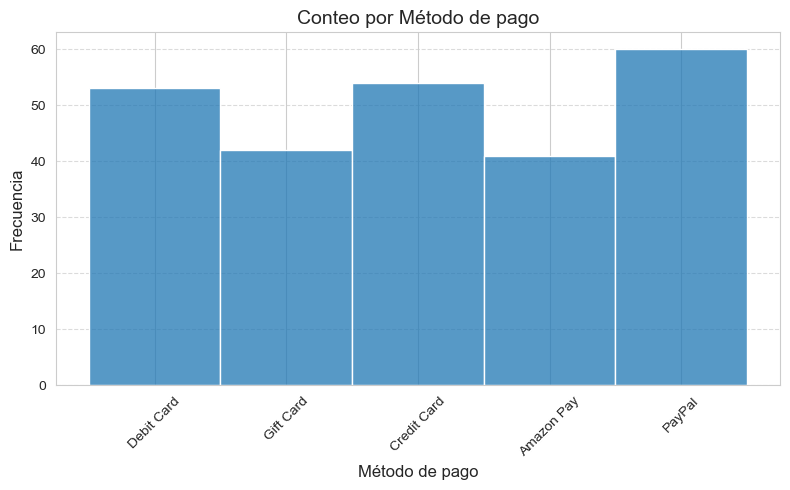

In [96]:
plt.figure(figsize=(8, 5))
# Gráfico de distribución de fechas
sns.histplot(data=df_ordenado, x='Payment Method')
plt.title('Conteo por Método de pago', fontsize=14)
plt.xlabel('Método de pago', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

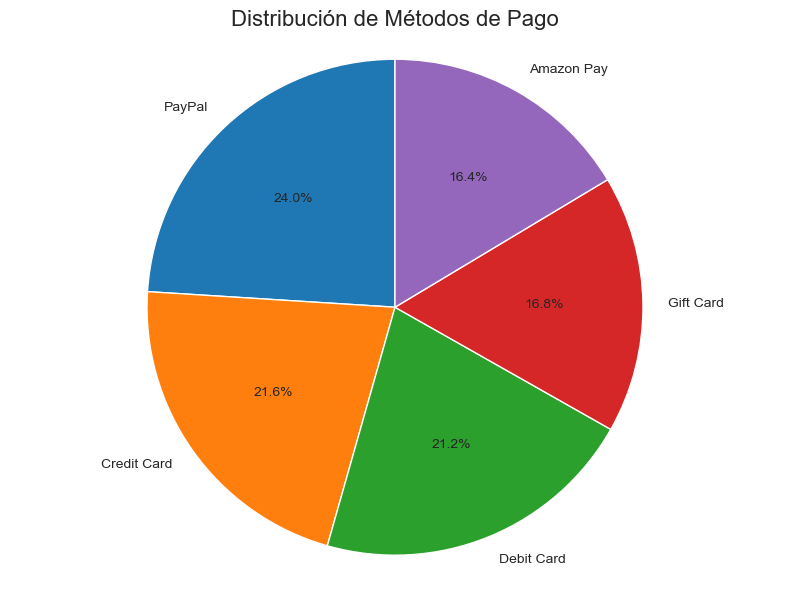

In [102]:
payment_counts = df_ordenado['Payment Method'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie( payment_counts , labels=payment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Métodos de Pago', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()


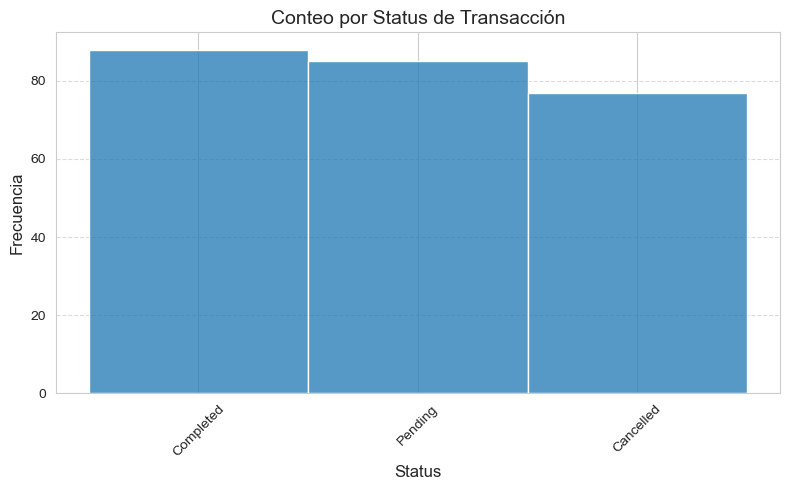

In [98]:
plt.figure(figsize=(8, 5))
# Gráfico de distribución de fechas
sns.histplot(data=df_ordenado, x='Status')
plt.title('Conteo por Status de Transacción', fontsize=14)
plt.xlabel('Status', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

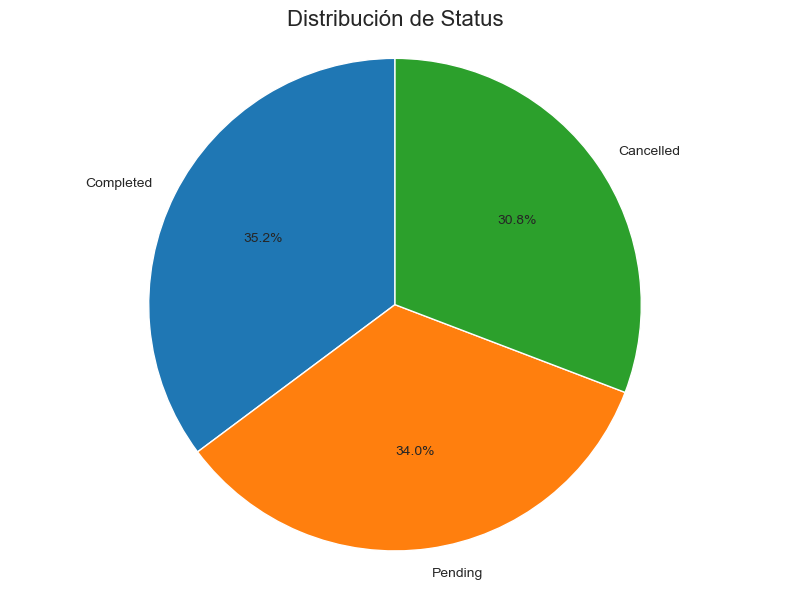

In [104]:
status_counts = df_ordenado['Status'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie( status_counts , labels=status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Status', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()


## Luego de tener un mejor conocimiento de nuestro conjunto de datos podemos realizar algunas hipótesis y analizar más en profundidad la relación de algunas variables

#### 1) A que se debe el porcentaje de transacciones canceladas?

#### 2) Cuáles son los productos / Categorías mas vendidos o con más exito?

#### 3) Hay alguna relación entre las locaciones / ciudades con los tipos de productos que compran?

#### 4) Época del año que se vende más


# 1) Transacciones Canceladas

In [106]:
df_canceladas = df_ordenado[df_ordenado['Status']=='Cancelled']
df_canceladas

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
2,ORD0059,2025-01-04,Smartwatch,Electronics,150,2,300,Daniel Harris,Dallas,Credit Card,Cancelled
11,ORD0227,2025-02-04,Headphones,Electronics,100,5,500,Emma Clark,Miami,Amazon Pay,Cancelled
13,ORD0100,2025-02-13,Running Shoes,Footwear,60,1,60,Jane Smith,Houston,Gift Card,Cancelled
15,ORD0026,2025-02-14,Washing Machine,Home Appliances,600,1,600,Olivia Wilson,Boston,Debit Card,Cancelled
19,ORD0218,2025-02-15,Headphones,Electronics,100,4,400,Daniel Harris,New York,Gift Card,Cancelled
...,...,...,...,...,...,...,...,...,...,...,...
241,ORD0061,2025-11-03,Refrigerator,Home Appliances,1200,1,1200,Jane Smith,New York,PayPal,Cancelled
242,ORD0225,2025-11-03,Jeans,Clothing,40,1,40,Sophia Miller,New York,Gift Card,Cancelled
244,ORD0029,2025-12-02,Smartphone,Electronics,500,1,500,Sophia Miller,Denver,Credit Card,Cancelled
248,ORD0172,2025-12-03,Book,Books,15,1,15,David Lee,Miami,Debit Card,Cancelled


In [110]:
df_canceladas['Order ID'].count()

np.int64(77)

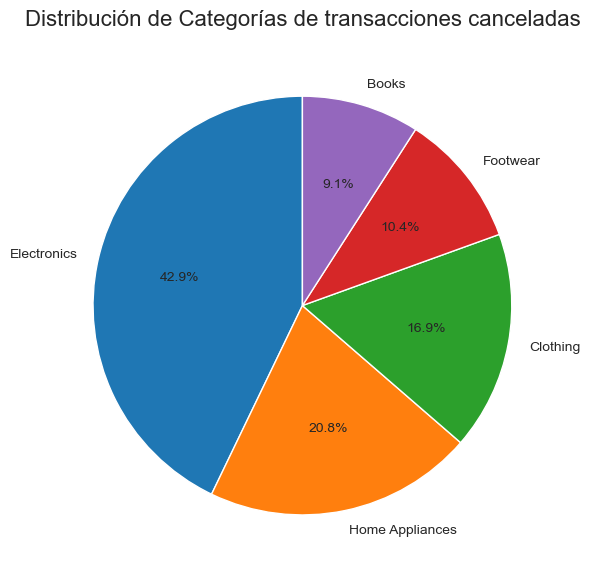

In [111]:
c = df_canceladas['Category'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie( c , labels=c.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Categorías de transacciones canceladas', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()

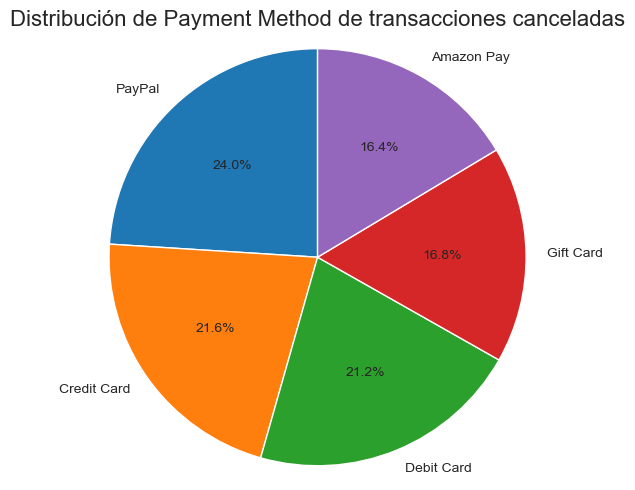

In [115]:
c = df_ordenado['Payment Method'].value_counts()
plt.figure(figsize=(6,5))
plt.pie( c , labels=c.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Payment Method de transacciones canceladas', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()

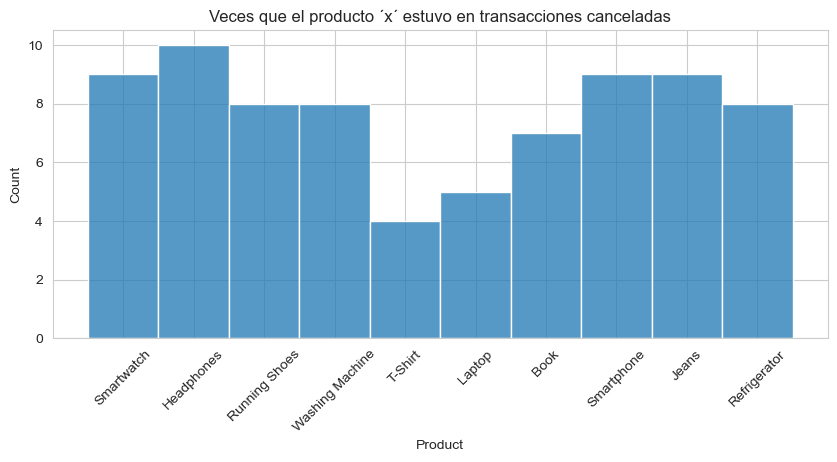

In [125]:
plt.figure(figsize=(10,4,))
sns.histplot(df_canceladas,x='Product')
plt.title('Veces que el producto ´x´ estuvo en transacciones canceladas')
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.figure(figsize=(10,4,))
sns.histplot(df_canceladas,x='Product')
plt.xticks(rotation=45)
plt.show()

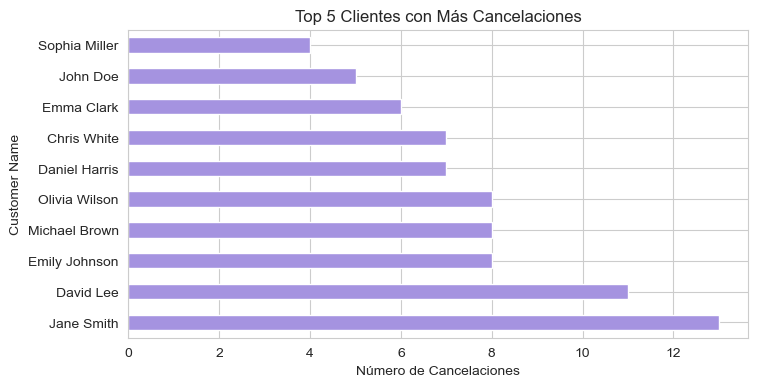

In [128]:
top_customers = df_canceladas['Customer Name'].value_counts()

plt.figure(figsize=(8, 4))
top_customers.plot(kind='barh', color='#A593E0')
plt.title('Top 5 Clientes con Más Cancelaciones')
plt.xlabel('Número de Cancelaciones')
plt.show()

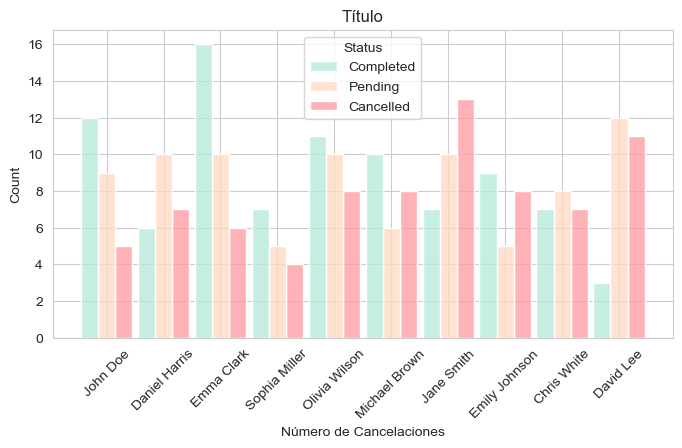

In [143]:
plt.figure(figsize=(8, 4))
sns.histplot(
    df_ordenado, 
    x='Customer Name', 
    hue='Status', 
    multiple='dodge', 
    shrink=0.9,
    palette={'Completed': '#B5EAD7', 'Pending':'#FFDAC1', 'Cancelled': '#FF9AA2'} 
)
plt.title('Título')
plt.xticks(rotation=45)
plt.xlabel('Número de Cancelaciones')
plt.show()

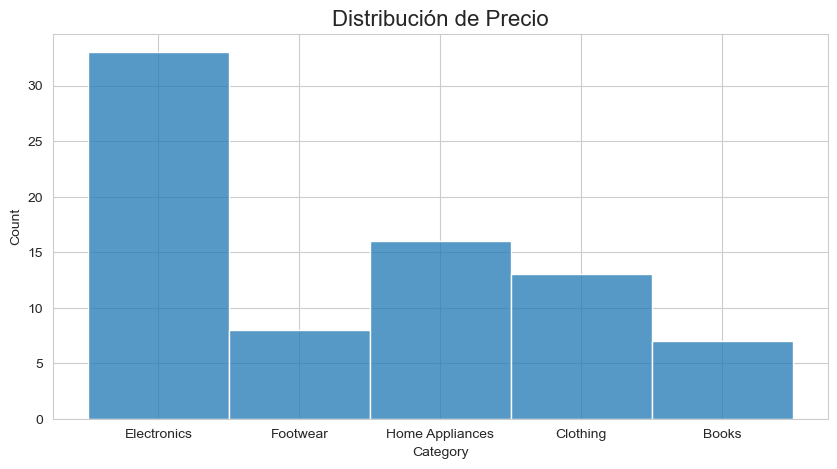

In [151]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df_canceladas, x='Category')
plt.title('Distribución de Precio', fontsize=16)
plt.show()

C:\Users\nicol\AppData\Local\Temp\ipykernel_2524\1818687409.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


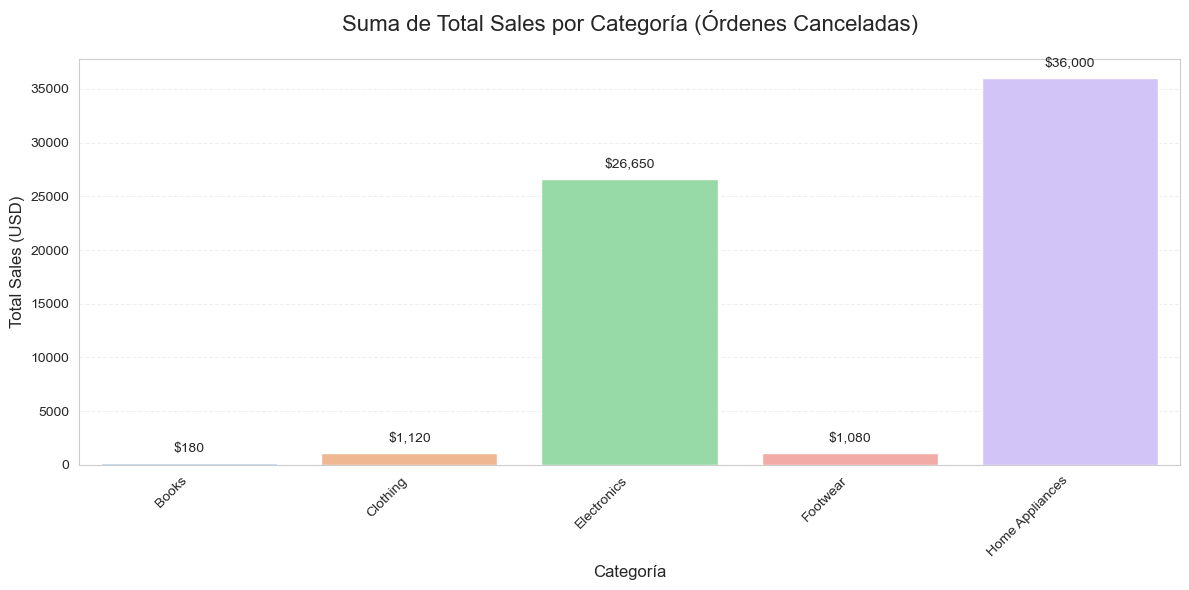

In [155]:
plt.figure(figsize=(12, 6))
df_c1 = df_canceladas.groupby('Category')['Total Sales'].sum().reset_index()

ax = sns.barplot(
    data=df_c1,
    x='Category',
    y='Total Sales',
    palette='pastel', 
)

for p in ax.patches:
    ax.annotate(
        f'${p.get_height():,.0f}',  # Formato: $1,000
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 10),
        textcoords='offset points',
        fontsize=10
    )

plt.title('Suma de Total Sales por Categoría (Órdenes Canceladas)', fontsize=16, pad=20)
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Total Sales (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

Type:           Axes
String form:    Axes(0.0700883,0.216867;0.917412x0.676836)
File:           c:\users\nicol\miniconda3\envs\amazon-sales\lib\site-packages\matplotlib\axes\_axes.py
Docstring:     
An Axes object encapsulates all the elements of an individual (sub-)plot in
a figure.

It contains most of the (sub-)plot elements: `~.axis.Axis`,
`~.axis.Tick`, `~.lines.Line2D`, `~.text.Text`, `~.patches.Polygon`, etc.,
and sets the coordinate system.

Like all visible elements in a figure, Axes is an `.Artist` subclass.

The `Axes` instance supports callbacks through a callbacks attribute which
is a `~.cbook.CallbackRegistry` instance.  The events you can connect to
are 'xlim_changed' and 'ylim_changed' and the callback will be called with
func(*ax*) where *ax* is the `Axes` instance.

.. note::

    As a user, you do not instantiate Axes directly, but use Axes creation
    methods instead; e.g. from `.pyplot` or `.Figure`:
    `~.pyplot.subplots`, `~.pyplot.subplot_mosaic` or `.Figure.a